<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP_2022/blob/main/02-Machine-Learning/notebooks/09-Decision-Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Árboles de decisión

En esta notebook usaremos el clasificador [Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) de scikit-learn. 

Primero, observaremos algunas caracteristicas generales del método y después, lo usaremos en un problema de clasificación con un dataset clásico del machine learning.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Ejemplo 1: Un ejemplo para explorar las características del clasificador DT

## 1. Datos linealmente separables con una línea horizontal

En este primer ejemplo generamos un conjunto de datos linealmente separables con `make_blobs`. Estos datos pueden ser separados con una línea vértical, es decir con una condición de tipo

* Si $x>\alpha$ entonces $(x,y)\in\text{clase}_0$.
* Si $x<\alpha$ entonces $(x,y)\in\text{clase}_1$.

Primero, generamos y visualizamos los datos

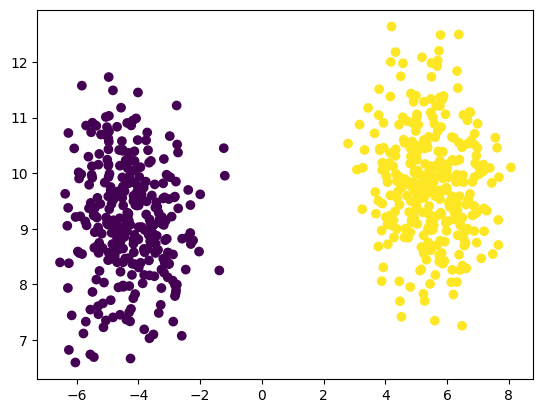

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=600,centers=2,random_state=31)

plt.figure()
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

Dividimos los datos en *train/test*. Entrenamos el árbol de decisión usando la implementación de scikit-learn `sklearn.tree.DecisionTreeClassifier`. Realizamos la predicción sobre el conjunto de prueba.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101) # 70% training and 30% test

clf = DecisionTreeClassifier()  # Inicializar el modelo
clf = clf.fit(X_train,y_train)  # Entrenar el modelo
y_pred = clf.predict(X_test)    # Predecir las etiquetas para el conjunto de prueba

Como es de esperar, obtenemos el 100% en todas las métricas

Accuracy: 1.0
Recall: 1.0
Precision: 1.0


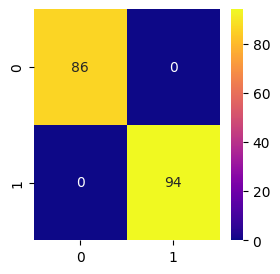

In [4]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score

print(f"Accuracy: {round(accuracy_score(y_test,y_pred),3)}")
print(f"Recall: {round(recall_score(y_test,y_pred),5)}")
print(f"Precision: {round(precision_score(y_test,y_pred),3)}")

plt.figure(figsize=(3,3))
cm = confusion_matrix(y_test,y_pred)
s_cm = sns.heatmap(cm,cmap='plasma',annot=True)
plt.show()

Veamos el árbol de decisión usando el módulo `tree` de scikit-learn.

In [5]:
from sklearn import tree

text_representation = tree.export_text(decision_tree=clf)
print(text_representation)

|--- feature_0 <= 0.80
|   |--- class: 0
|--- feature_0 >  0.80
|   |--- class: 1



Visualizamos la *frontera de decisión* usando `dtreeviz`. Esta es una biblioteca python para la visualización de árboles de decisión y la interpretación de modelos ([documentación](https://github.com/parrt/dtreeviz)).

In [6]:
!pip install -qq dtreeviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.5/91.5 kB 1.9 MB/s eta 0:00:00


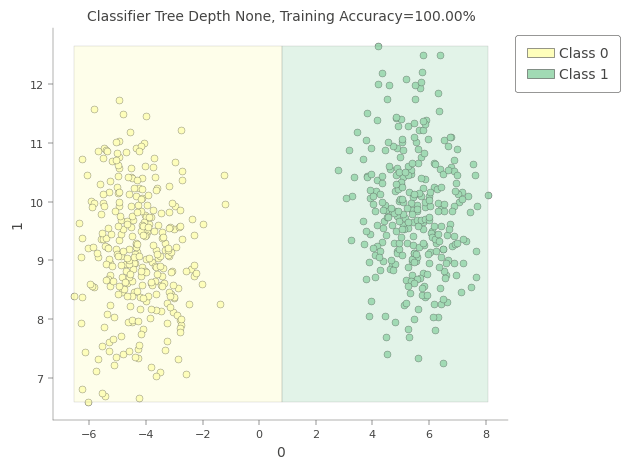

In [7]:
# from dtreeviz.trees import ctreeviz_bivar
from dtreeviz import model

# ct = ctreeviz_bivar(clf, X, y, feature_names = ['0','1'],fontname='DejaVu Sans')
ct = model(clf, X, y, feature_names = ['0','1'])
ct.ctree_feature_space(fontname='DejaVu Sans')

plt.tight_layout()
plt.show()

## Datos linealmente separables con una línea con pendiente $m\neq 0$.

Transformamos los datos para ahora sean separables con línea no horizontal. Para esto, rotamos cada punto un ángulo $\theta=\frac{\pi}{4}=45°$; esto lo hacemos multiplicando por la matriz de rotación:

$$R=\left(\begin{array}{cc}\cos(\frac{\pi}{4}) & -\sin(\frac{\pi}{4}) \\
\sin(\frac{\pi}{4}) & \cos(\frac{\pi}{4})\end{array}\right)$$

<br>

$$X_r = (R\cdot X^T)^T$$

Después trasladamos la clase *amarilla* con el vector $z=(-1,-2)$.


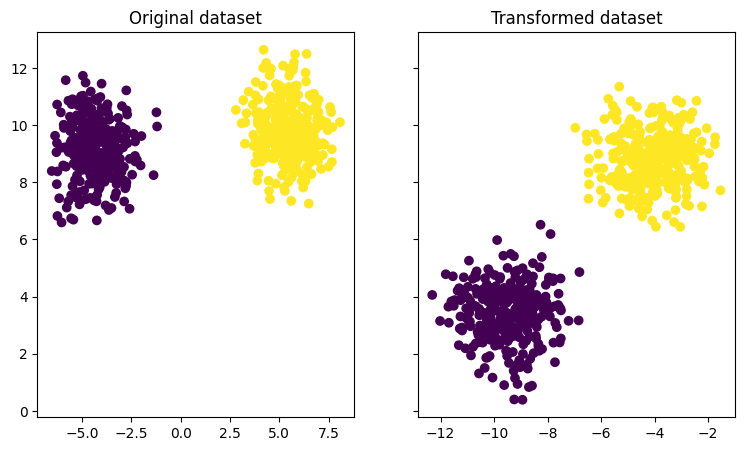

In [8]:
import numpy as np

theta = np.pi/4 # Ángulo de rotación
R = np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]]) # Matriz de rotación

Xr = np.transpose(R@np.transpose(X)) # Rotamos el dataset

idxs = np.where(y==1)[0]   # Obtenemos los índices donde y=1

Xr[idxs,:] = Xr[idxs,:] + np.array([-1,-2])

fig, axs = plt.subplots(1,2,figsize=(9,5),sharey=True)
axs[0].scatter(X[:,0],X[:,1],c=y)
axs[0].set_title("Original dataset")
axs[1].scatter(Xr[:,0],Xr[:,1],c=y)
axs[1].set_title("Transformed dataset")
fig.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(Xr, y, test_size=0.3, random_state=101) # 70% training and 30% test

clf = DecisionTreeClassifier()  # Create Decision Tree classifier object
clf = clf.fit(X_train,y_train)  # Train Decision Tree Classifier
y_pred = clf.predict(X_test)    # Predict the response for test dataset

Dados que los datos siguen siendo linealmente separables, seguimos obteniendo el 100% en todas las métricas.

Accuracy: 1.0
Recall: 1.0
Precision: 1.0


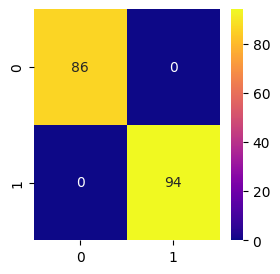

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score

print(f"Accuracy: {round(accuracy_score(y_test,y_pred),3)}")
print(f"Recall: {round(recall_score(y_test,y_pred),5)}")
print(f"Precision: {round(precision_score(y_test,y_pred),3)}")

plt.figure(figsize=(3,3))
cm = confusion_matrix(y_test,y_pred)
s_cm = sns.heatmap(cm,cmap='plasma',annot=True, fmt='g')
plt.show()

Sin embargo, el árbol empieza a hacerse más complejo.

In [11]:
from sklearn import tree

text_representation = tree.export_text(decision_tree=clf)
print(text_representation)

|--- feature_1 <= 6.32
|   |--- class: 0
|--- feature_1 >  6.32
|   |--- feature_0 <= -7.61
|   |   |--- class: 0
|   |--- feature_0 >  -7.61
|   |   |--- class: 1



La frontera de decisión no es la que esperaríamos:

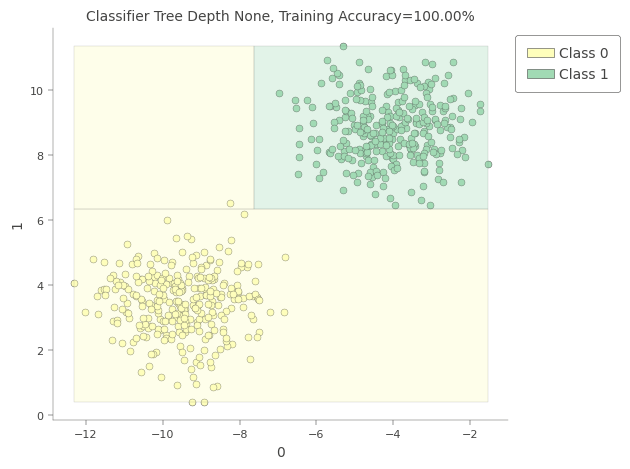

In [12]:
from dtreeviz import model

ct = model(clf, Xr, y, feature_names = ['0','1'])
ct.ctree_feature_space(fontname='DejaVu Sans')
plt.tight_layout()
plt.show()

Como podemos ver, este clasificador no separa con una línea en general, aún si los datos son linealmente separables. Separa con una FD compuesta de segmentos de línea verticales y horizontales.

## Efecto de perturbaciones

Ahora, observemos el efecto de perturbar levemente el conjunto de datos. ¿Qué le pasa al arbol de decisión?

Movemos un par de puntos cerca de la FD.

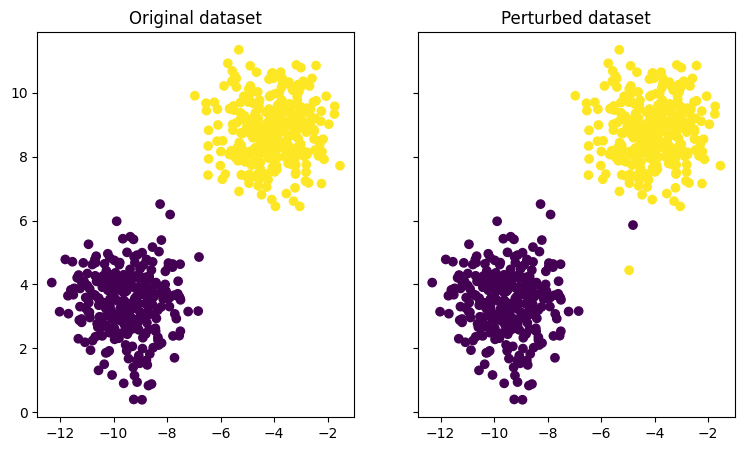

In [13]:
Xrp = Xr.copy()
Xrp[192] = Xrp[192] + np.array([-1,-2])
Xrp[486] = Xrp[486] + np.array([2,1])

fig, axs = plt.subplots(1,2,figsize=(9,5),sharey=True)
axs[0].scatter(Xr[:,0],Xr[:,1],c=y)
axs[0].set_title("Original dataset")
axs[1].scatter(Xrp[:,0],Xrp[:,1],c=y)
axs[1].set_title("Perturbed dataset")
fig.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(Xrp, y, test_size=0.3, random_state=101) # 70% training and 30% test

clf = DecisionTreeClassifier()  # Create Decision Tree classifier object
clf = clf.fit(X_train,y_train)  # Train Decision Tree Classifier
y_pred = clf.predict(X_test)    # Predict the response for test dataset

Accuracy: 0.994
Recall: 0.98936
Precision: 1.0


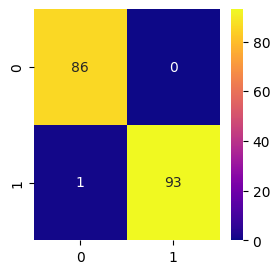

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score

print(f"Accuracy: {round(accuracy_score(y_test,y_pred),3)}")
print(f"Recall: {round(recall_score(y_test,y_pred),5)}")
print(f"Precision: {round(precision_score(y_test,y_pred),3)}")

plt.figure(figsize=(3,3))
cm = confusion_matrix(y_test,y_pred)
s_cm = sns.heatmap(cm,cmap='plasma',annot=True, fmt='g')
plt.show()

In [16]:
from sklearn import tree

text_representation = tree.export_text(decision_tree=clf)
print(text_representation)

|--- feature_1 <= 6.59
|   |--- feature_0 <= -5.90
|   |   |--- class: 0
|   |--- feature_0 >  -5.90
|   |   |--- feature_0 <= -4.88
|   |   |   |--- class: 1
|   |   |--- feature_0 >  -4.88
|   |   |   |--- class: 0
|--- feature_1 >  6.59
|   |--- class: 1



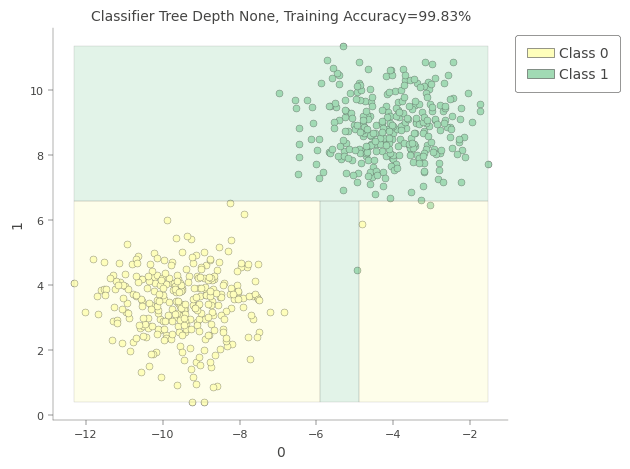

In [17]:
from dtreeviz import model

ct = model(clf, Xrp, y, feature_names = ['0','1'])
ct.ctree_feature_space(fontname='DejaVu Sans')
plt.tight_layout()
plt.show()

# Ejemplo 2

## 1. El conjunto de datos

Este dataset fue creado por el *National Institute of Diabetes and Digestive and Kidney Diseases* de Estados Unidos. El objetivo del dataset es predecir el diagnostico de cuándo un paciente tiene diabetes o no, basado en ciertas mediciones incluidas en el dataset. Varias restricciones fueron usadas en la selección de estas instancias para filtrar el dataset. En particular, se trata pacientes femeninas de al menos 21 años de edad pertenecientes al grupo indígena Pima de Arizona.

Las variables incluidas son el numero de embarazos la paciente ha tenido, su BMI, nivel de insulina, edad, entre otras.

El dataset se encuentra en https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database.

In [18]:
import pandas as pd

url = 'https://github.com/DCDPUAEM/DCDP/raw/main/02-Machine-Learning/data/diabetes.csv'
df = pd.read_csv(url,index_col=0)
df

pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  label
0           6      148  72    35        0  33.6     0.627   50      1
1           1       85  66    29        0  26.6     0.351   31      0
2           8      183  64     0        0  23.3     0.672   32      1
3           1       89  66    23       94  28.1     0.167   21      0
4           0      137  40    35      168  43.1     2.288   33      1
..        ...      ...  ..   ...      ...   ...       ...  ...    ...
763        10      101  76    48      180  32.9     0.171   63      0
764         2      122  70    27        0  36.8     0.340   27      0
765         5      121  72    23      112  26.2     0.245   30      0
766         1      126  60     0        0  30.1     0.349   47      1
767         1       93  70    31        0  30.4     0.315   23      0

[768 rows x 9 columns]

## Entrenar el clasificador y resultados

Escogemos las *features* que usaremos y definimos el dataset de features y el vector de etiquetas

In [19]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']

X = df[feature_cols].values    # Features
y = df['label'].values         # Target variable

Dividimos los datos en train/test. Entrenamos el árbol de decisión usando la implementación de scikit-learn sklearn.tree.DecisionTreeClassifier. Realizamos la predicción sobre el conjunto de prueba.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

clf = DecisionTreeClassifier()  
clf = clf.fit(X_train,y_train) 
y_pred = clf.predict(X_test)   

Accuracy: 0.684
Recall: 0.50588
Precision: 0.581


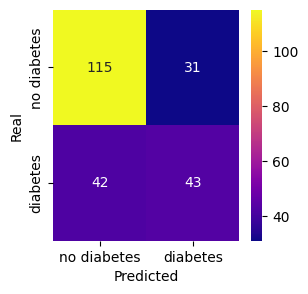

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score

print(f"Accuracy: {round(accuracy_score(y_test,y_pred),3)}")
print(f"Recall: {round(recall_score(y_test,y_pred),5)}")
print(f"Precision: {round(precision_score(y_test,y_pred),3)}")

target_labels = ['no diabetes','diabetes']

plt.figure(figsize=(3,3))
cm = confusion_matrix(y_test,y_pred)
s_cm = sns.heatmap(cm,cmap='plasma',annot=True, fmt='g',
            xticklabels=target_labels,
            yticklabels=target_labels)
s_cm.set(xlabel='Predicted',ylabel='Real')
plt.show()

Podemos obtener la importancia de las features

In [22]:
clf.feature_importances_

array([0.03820486, 0.05545633, 0.18438745, 0.09644146, 0.33710076,
       0.14342266, 0.14498647])

In [23]:
importances_df = pd.DataFrame({'feature':feature_cols,'importancia':np.round(clf.feature_importances_,3)})
importances_df.sort_values(by='importancia',ascending=False,inplace=True)
importances_df.set_index('feature')

importancia
feature              
glucose         0.337
bmi             0.184
pedigree        0.145
bp              0.143
age             0.096
insulin         0.055
pregnant        0.038

## Visualizar el árbol

### Text representation with sklearn

In [24]:
from sklearn import tree

text_representation = tree.export_text(decision_tree=clf,
                                       feature_names=feature_cols)
print(text_representation)

|--- glucose <= 129.50
|   |--- bmi <= 26.30
|   |   |--- bmi <= 9.10
|   |   |   |--- glucose <= 114.50
|   |   |   |   |--- class: 0
|   |   |   |--- glucose >  114.50
|   |   |   |   |--- class: 1
|   |   |--- bmi >  9.10
|   |   |   |--- pedigree <= 0.67
|   |   |   |   |--- class: 0
|   |   |   |--- pedigree >  0.67
|   |   |   |   |--- pedigree <= 0.71
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- pedigree >  0.71
|   |   |   |   |   |--- class: 0
|   |--- bmi >  26.30
|   |   |--- age <= 27.50
|   |   |   |--- bmi <= 45.40
|   |   |   |   |--- pregnant <= 7.00
|   |   |   |   |   |--- bp <= 12.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- bp >  12.00
|   |   |   |   |   |   |--- pedigree <= 1.27
|   |   |   |   |   |   |   |--- bmi <= 30.95
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- bmi >  30.95
|   |   |   |   |   |   |   |   |--- bp <= 53.00
|   |   |   |   |   |   |   |   |   |--- pregnant <= 2.50
|   |   |   | 

In [25]:
with open("decistion_tree_textrep.log", "w") as txt_file:
    txt_file.write(text_representation)

### Plot tree with sklearn

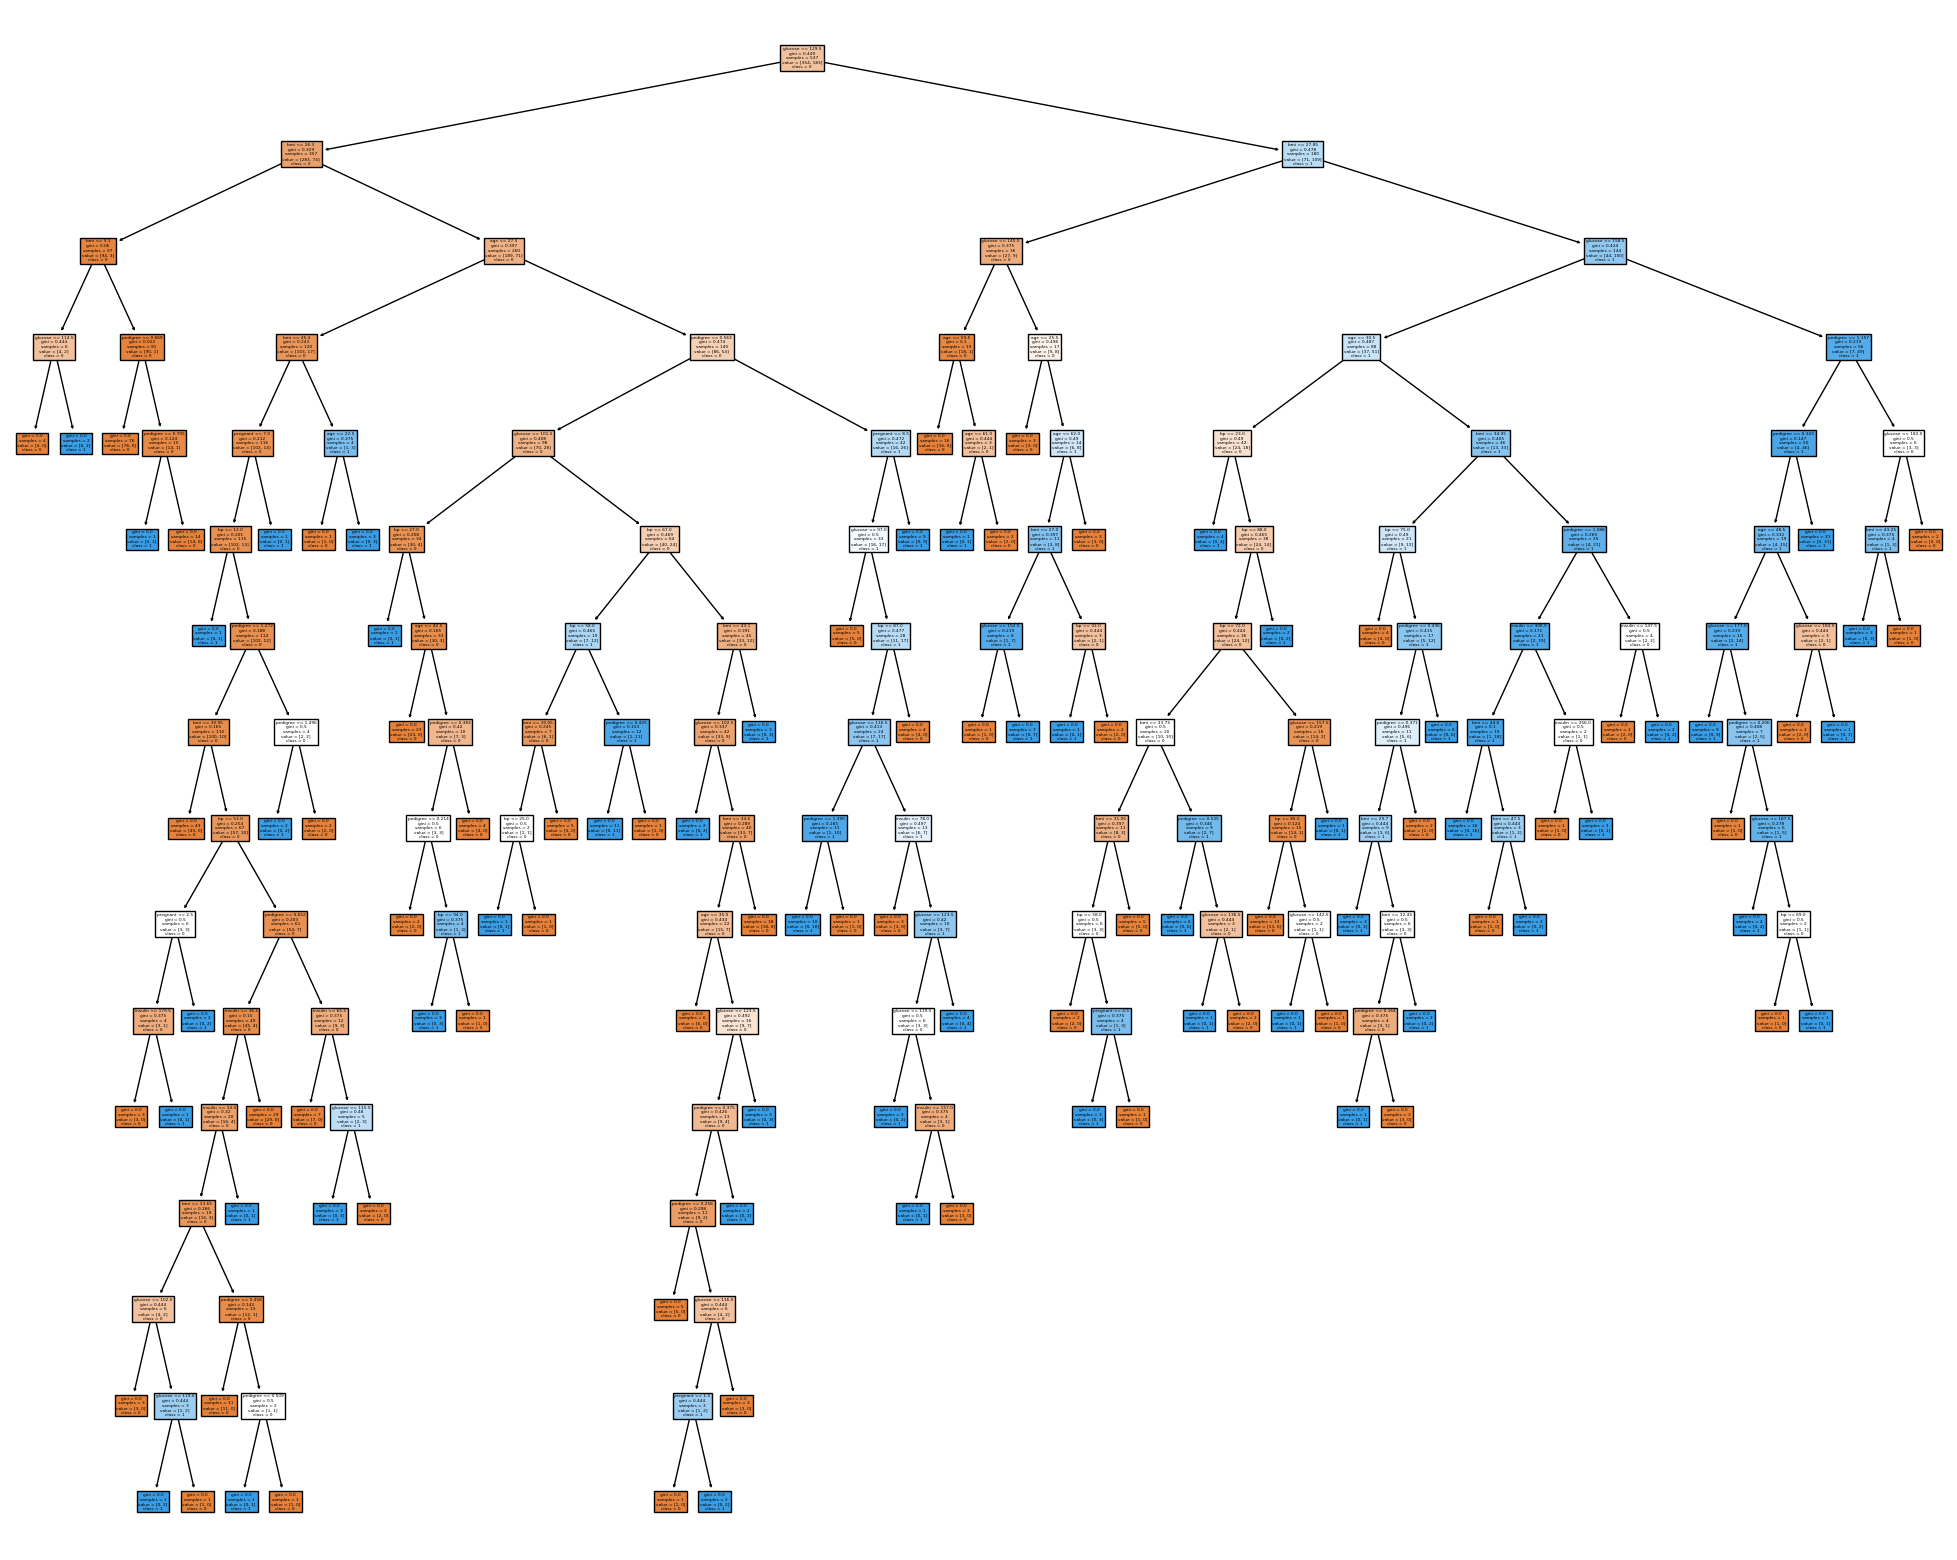

In [26]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=feature_cols,  
                   class_names=['0','1'],
                   filled=True)


### Using [graphviz](https://graphviz.org/)

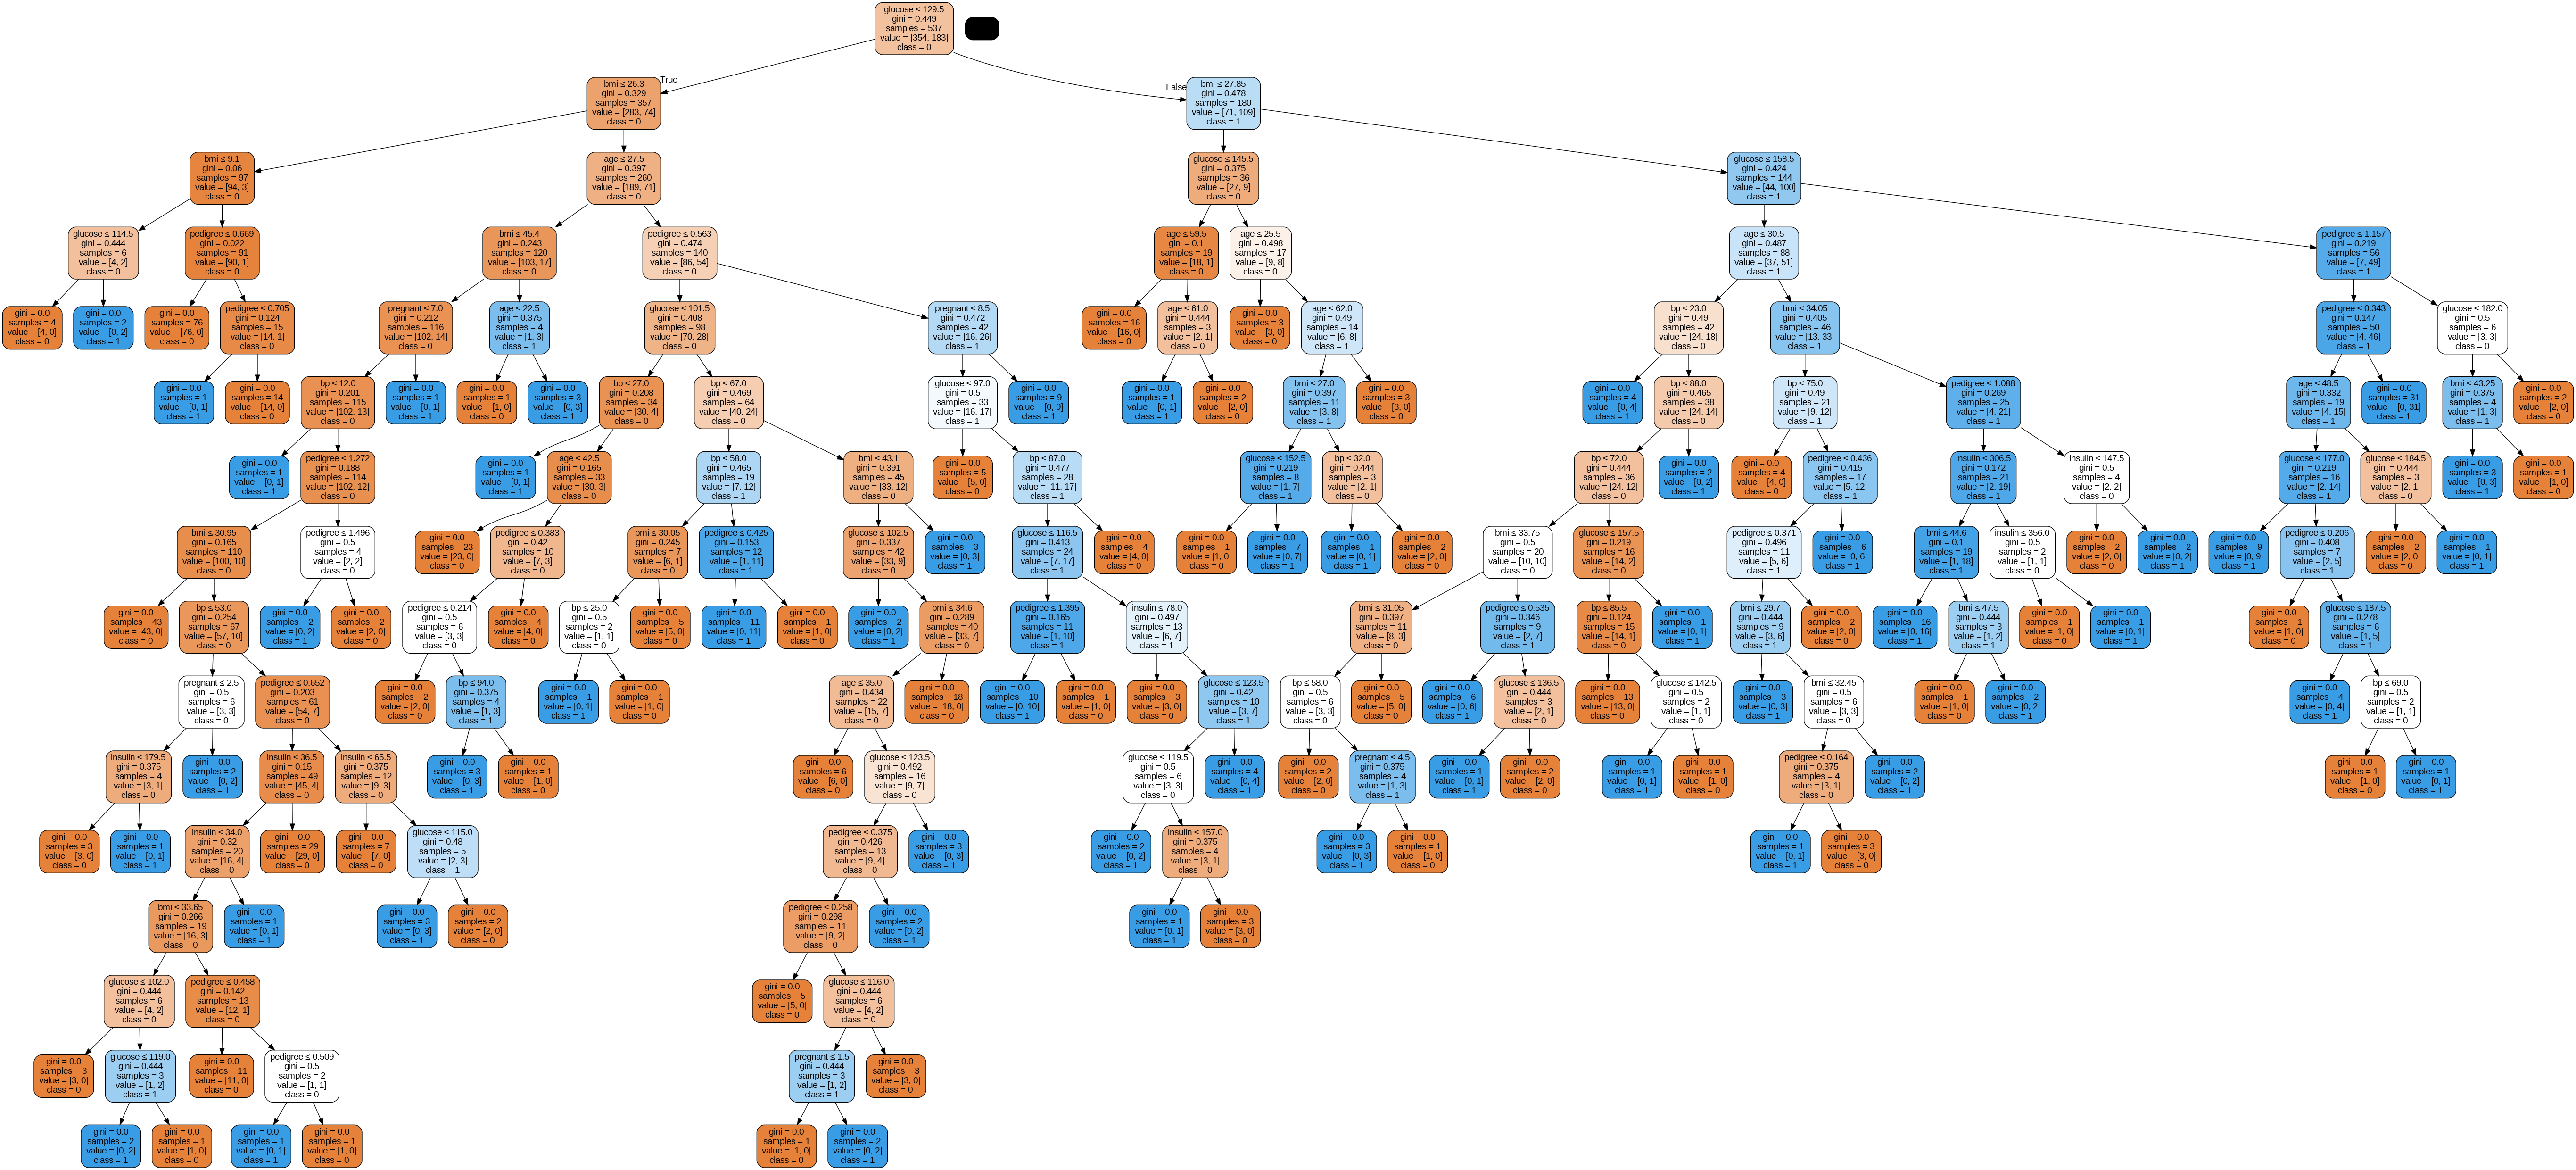

In [27]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

### Plot tree with [dtreeviz](https://github.com/parrt/dtreeviz)

In [28]:
from dtreeviz import model

ct = model(clf, X, y, feature_names = feature_cols)
ct.view(fontname='DejaVu Sans')

In [29]:
x = X[0]

ct.view(fontname='DejaVu Sans',
        x=x,
        orientation="LR")

#⭕ **Práctica**:

¿Puedes subir las métricas de desempeño de este clasificador en este dataset? Considera las siguientes modificaciones:

* Observar la variable 'bmi', tiene valores 0, ¿qué sentido tienen estos?
    * Puedes quitar esas instancias.
    * Puedes quitar la variable.
* Cambiar el conjunto de features, ya sea manualmente o con algún método como [VarianceThreshold](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html#sklearn.feature_selection.VarianceThreshold), [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html), etc.
* Normalizar o estadarizar los datos.
* Realizar un gridsearch en los parámetros del clasificador.

A continuación se muestra una estrategia para obtener alrededor de 75% de accuracy. 

Esta estrategia usa un imputador para reemplazar los valores 0 con el promedio. Además, se hace selección de features y reescalamiento. Todo se junta en un pipeline.

Puedes probar modificando algunos pasos para buscar obtener un mejor rendimiento.

In [62]:
import pandas as pd

url = 'https://github.com/DCDPUAEM/DCDP/raw/main/02-Machine-Learning/data/diabetes.csv'
df = pd.read_csv(url,index_col=0)
df

pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  label
0           6      148  72    35        0  33.6     0.627   50      1
1           1       85  66    29        0  26.6     0.351   31      0
2           8      183  64     0        0  23.3     0.672   32      1
3           1       89  66    23       94  28.1     0.167   21      0
4           0      137  40    35      168  43.1     2.288   33      1
..        ...      ...  ..   ...      ...   ...       ...  ...    ...
763        10      101  76    48      180  32.9     0.171   63      0
764         2      122  70    27        0  36.8     0.340   27      0
765         5      121  72    23      112  26.2     0.245   30      0
766         1      126  60     0        0  30.1     0.349   47      1
767         1       93  70    31        0  30.4     0.315   23      0

[768 rows x 9 columns]

Veamos las columnas con valores 0 para decidir cuales tienen valores faltantes

In [34]:
df.describe()

pregnant     glucose          bp        skin     insulin         bmi  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

         pedigree         age       label  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%      0.372500   29.000000    0.000000  
75%      0.626250   41.000000    1.000000  
max      2.420000   81.000000    1.000000

Realizamos la imputación con el promedio

In [38]:
from sklearn.impute import SimpleImputer

features_with_missing_values = ['glucose','skin','bmi']
missing_values_columns = df.loc[:,features_with_missing_values].values

imputador = SimpleImputer(missing_values=0,strategy='mean')
imputed_values_columns = imputador.fit_transform(missing_values_columns)

df[features_with_missing_values] = imputed_values_columns
df

pregnant  glucose  bp      skin  insulin   bmi  pedigree  age  label
0           6    148.0  72  35.00000        0  33.6     0.627   50      1
1           1     85.0  66  29.00000        0  26.6     0.351   31      0
2           8    183.0  64  29.15342        0  23.3     0.672   32      1
3           1     89.0  66  23.00000       94  28.1     0.167   21      0
4           0    137.0  40  35.00000      168  43.1     2.288   33      1
..        ...      ...  ..       ...      ...   ...       ...  ...    ...
763        10    101.0  76  48.00000      180  32.9     0.171   63      0
764         2    122.0  70  27.00000        0  36.8     0.340   27      0
765         5    121.0  72  23.00000      112  26.2     0.245   30      0
766         1    126.0  60  29.15342        0  30.1     0.349   47      1
767         1     93.0  70  31.00000        0  30.4     0.315   23      0

[768 rows x 9 columns]

In [63]:
feature_names = df.columns.to_list()[:-1]

print(f"Nombres de las features: {feature_names}")

Nombres de las features: ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']


In [64]:
X = df.loc[:,feature_names].values
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [65]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, VarianceThreshold
from sklearn.preprocessing import MinMaxScaler

# selector = SelectKBest(k=5)
selector = VarianceThreshold(0.25)
scaler = MinMaxScaler()
clf = DecisionTreeClassifier() 

pl = Pipeline([('selector',selector),
               ('escalador',scaler),
               ('clasificador',clf)])

In [66]:
pl.fit(X_train,y_train)
pl.score(X_train,y_train)

1.0

In [67]:
y_pred = pl.predict(X_test)

print(f"Accuracy: {round(accuracy_score(y_test,y_pred),3)}")
print(f"Recall: {round(recall_score(y_test,y_pred),3)}")
print(f"Precision: {round(precision_score(y_test,y_pred),3)}")

Accuracy: 0.701
Recall: 0.576
Precision: 0.598


In [69]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    # "selector__k": [2,3,4,5,6],
    "selector__threshold": [0,0.1,0.2,0.5],
    "clasificador__criterion": ['gini','entropy','log_loss'],
    "clasificador__max_depth": [None,10,20],
    "clasificador__min_samples_split": [2,3,4]
}

search = GridSearchCV(pl, param_grid, n_jobs=2)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)


Best parameter (CV score=0.708):
{'clasificador__criterion': 'log_loss', 'clasificador__max_depth': 10, 'clasificador__min_samples_split': 4, 'selector__threshold': 0}


In [73]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler

selector = SelectKBest(k=4)
# selector = VarianceThreshold(0)
scaler = MinMaxScaler()
clf = DecisionTreeClassifier(criterion='log_loss', 
                             max_depth=10,
                             min_samples_split=4) 

pl = Pipeline([('selector',selector),
               ('escalador',scaler),
               ('clasificador',clf)])

pl.fit(X_train,y_train)
pl.score(X_train,y_train)

0.9068901303538175

In [74]:
y_pred = pl.predict(X_test)

print(f"Accuracy: {round(accuracy_score(y_test,y_pred),3)}")
print(f"Recall: {round(recall_score(y_test,y_pred),3)}")
print(f"Precision: {round(precision_score(y_test,y_pred),3)}")

Accuracy: 0.753
Recall: 0.753
Precision: 0.64
